In [149]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import PercentFormatter
import numpy as np

In [150]:
crm = pd.read_excel("/content/drive/MyDrive/Acelera/Bases tratadas/base_crm_tratada.xlsx")

In [151]:
cadastro = pd.read_excel("/content/drive/MyDrive/Acelera/Bases tratadas/base_cadastro_conta_digital_tratada.xlsx")

In [152]:
correntista = cadastro.merge(crm, how='left', right_on='ID_Lead', left_on='ID_lead')

## Correlação

In [153]:
correntista.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 512 entries, 0 to 511
Data columns (total 22 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   data do cadastro da conta digital  512 non-null    datetime64[ns]
 1   ID_lead                            512 non-null    int64         
 2   DDD do celular                     512 non-null    int64         
 3   área de atuação                    512 non-null    object        
 4   cargo atual                        512 non-null    object        
 5   objetivo da conta digital          512 non-null    object        
 6   como conheceu o BR Bank            512 non-null    object        
 7   Estado                             512 non-null    object        
 8   mês da abertura                    512 non-null    object        
 9   ID_Lead                            461 non-null    float64       
 10  Vendedor que atendeu               461

In [154]:
correntista[['Conversão',	'Receita',	'Qtde dias conversão',	'Qtde dias perda']].corr()

,Conversão,Receita,Qtde dias conversão,Qtde dias perda
Conversão,1.000000,-0.115405,NaN,NaN
Receita,-0.115405,1.000000,0.0601,0.110183
Qtde dias conversão,NaN,0.060100,1.0000,NaN
Qtde dias perda,NaN,0.110183,NaN,1.000000


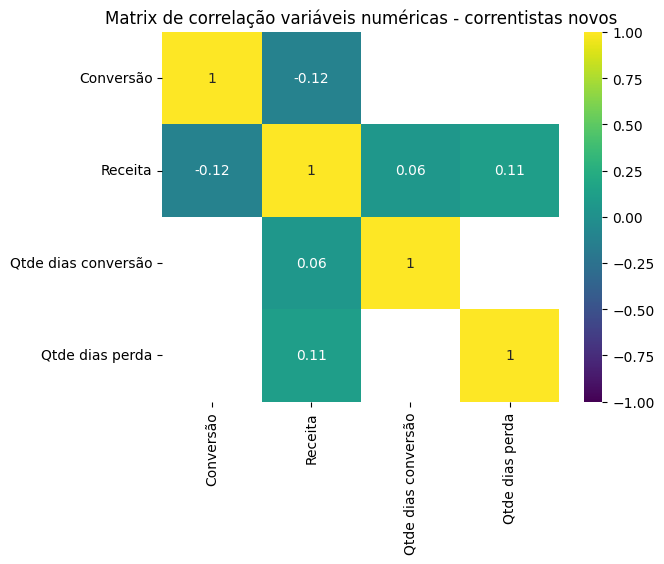

In [155]:
sns.heatmap(correntista[['Conversão',	'Receita',	'Qtde dias conversão',	'Qtde dias perda']].corr(), cmap='viridis', vmin=-1, vmax=1, annot=True)
plt.title("Matrix de correlação variáveis numéricas - correntistas novos")
plt.show()

## Information value

### Área de atuação

In [156]:
freq_abs = pd.DataFrame(correntista['área de atuação'].value_counts())
freq_rel = pd.DataFrame(correntista['área de atuação'].value_counts(1)*100).round(2)
freq_area_atuacao = freq_abs.merge(freq_rel, how='left', left_index=True, right_index=True).reset_index()
freq_area_atuacao.columns = ['área de atuação', 'Qtde', '%']
freq_abs_sim = correntista[correntista['Conversões']=="Sim"]['área de atuação'].value_counts(dropna=False).reset_index()
freq_abs_sim.columns = ['área de atuação', 'Sim']
freq_abs_nao = correntista[correntista['Conversões']=="Não"]['área de atuação'].value_counts(dropna=False).reset_index()
freq_abs_nao.columns = ['área de atuação', 'Não']
freq_rel_sim = correntista[correntista['Conversões']=="Sim"]['área de atuação'].value_counts(1, dropna=False).reset_index().round(2)
freq_rel_sim.columns = ['área de atuação', '% Sim']
freq_rel_nao = correntista[correntista['Conversões']=="Não"]['área de atuação'].value_counts(1, dropna=False).reset_index().round(2)
freq_rel_nao.columns = ['área de atuação', '% Não']
freq_IV_area = freq_area_atuacao.merge(freq_abs_sim.merge(freq_abs_nao.merge(freq_rel_sim.merge(freq_rel_nao, how='outer'), how='outer'), how='outer'), how='outer')
freq_IV_area.fillna(0, inplace=True)
freq_IV_area['Sim'] = freq_IV_area['Sim'].astype(int)
freq_IV_area['% taxa de Sim'] = (freq_IV_area['Sim']/freq_IV_area['Qtde'] * 100).round(2)
freq_IV_area['Odds'] = (freq_IV_area['% Sim']/freq_IV_area['% Não']).round(2)
freq_IV_area['LN(Odds)'] = np.log(freq_IV_area['Odds']).round(2)
freq_IV_area['IV'] = ((freq_IV_area['% Sim']-freq_IV_area['% Não'])*freq_IV_area['LN(Odds)']).round(2)
freq_IV_area.replace([np.inf, -np.inf], 0, inplace=True)
freq_IV_area.sort_values("% taxa de Sim", ascending = False)

/usr/local/lib/python3.9/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,área de atuação,Qtde,%,Sim,Não,% Sim,% Não,% taxa de Sim,Odds,LN(Odds),IV
16,Engenharia/Matemática/Estatística/Física,3,0.59,1,1,0.02,0.00,33.33,0.00,0.00,0.00
8,Outros,18,3.52,5,12,0.08,0.03,27.78,2.67,0.98,0.05
14,Direito / Jurídico,12,2.34,3,7,0.05,0.02,25.00,2.50,0.92,0.03
5,Comercial / Vendas,20,3.91,4,16,0.06,0.04,20.00,1.50,0.41,0.01
7,Marketing/Publicidade,19,3.71,3,13,0.05,0.03,15.79,1.67,0.51,0.01
0,Economia/Administração ou Mercado Financeiro,123,24.02,18,91,0.29,0.23,14.63,1.26,0.23,0.01
2,Tecnologia,51,9.96,7,36,0.11,0.09,13.73,1.22,0.20,0.00
12,Recursos Humanos,15,2.93,2,12,0.03,0.03,13.33,1.00,0.00,0.00
9,Educação,16,3.12,2,13,0.03,0.03,12.50,1.00,0.00,0.00
10,Auditoria / Controles Internos,16,3.12,2,12,0.03,0.03,12.50,1.00,0.00,0.00


In [157]:
freq_IV_area['IV'].sum()

0.18

In [158]:
((freq_IV_area['Sim'].sum()/freq_IV_area['Qtde'].sum())*100).round(2)

12.3

### Cargo atual

In [159]:
freq_abs = pd.DataFrame(correntista['cargo atual'].value_counts())
freq_rel = pd.DataFrame(correntista['cargo atual'].value_counts(1)*100).round(2)
freq_cargo = freq_abs.merge(freq_rel, how='left', left_index=True, right_index=True).reset_index()
freq_cargo.columns = ['cargo atual', 'Qtde', '%']
freq_abs_sim = correntista[correntista['Conversões']=="Sim"]['cargo atual'].value_counts(dropna=False).reset_index()
freq_abs_sim.columns = ['cargo atual', 'Sim']
freq_abs_nao = correntista[correntista['Conversões']=="Não"]['cargo atual'].value_counts(dropna=False).reset_index()
freq_abs_nao.columns = ['cargo atual', 'Não']
freq_rel_sim = correntista[correntista['Conversões']=="Sim"]['cargo atual'].value_counts(1, dropna=False).reset_index().round(2)
freq_rel_sim.columns = ['cargo atual', '% Sim']
freq_rel_nao = correntista[correntista['Conversões']=="Não"]['cargo atual'].value_counts(1, dropna=False).reset_index().round(2)
freq_rel_nao.columns = ['cargo atual', '% Não']
freq_IV_cargo = freq_cargo.merge(freq_abs_sim.merge(freq_abs_nao.merge(freq_rel_sim.merge(freq_rel_nao, how='outer'), how='outer'), how='outer'), how='outer')
freq_IV_cargo.fillna(0, inplace=True)
freq_IV_cargo['Sim'] = freq_IV_cargo['Sim'].astype(int)
freq_IV_cargo['% taxa de Sim'] = (freq_IV_cargo['Sim']/freq_IV_cargo['Qtde'] * 100).round(2)
freq_IV_cargo['Odds'] = (freq_IV_cargo['% Sim']/freq_IV_cargo['% Não']).round(2)
freq_IV_cargo['LN(Odds)'] = np.log(freq_IV_cargo['Odds']).round(2)
freq_IV_cargo['IV'] = ((freq_IV_cargo['% Sim']-freq_IV_cargo['% Não'])*freq_IV_cargo['LN(Odds)']).round(2)
freq_IV_cargo.replace([np.inf, -np.inf], 0, inplace=True)
freq_IV_cargo.fillna(0, inplace=True)
freq_IV_cargo.sort_values("% taxa de Sim", ascending = False)

/usr/local/lib/python3.9/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,cargo atual,Qtde,%,Sim,Não,% Sim,% Não,% taxa de Sim,Odds,LN(Odds),IV
12,Autônomo,2,0.39,1,0.0,0.02,0.00,50.00,0.00,0.00,0.00
9,Consultor,4,0.78,1,2.0,0.02,0.01,25.00,2.00,0.69,0.01
1,Estou desempregado(a) no momento,78,15.23,17,53.0,0.27,0.13,21.79,2.08,0.73,0.10
6,Outros,29,5.66,6,21.0,0.10,0.05,20.69,2.00,0.69,0.03
7,Estudante ou Assistente,11,2.15,2,6.0,0.03,0.02,18.18,1.50,0.41,0.00
4,Estudante,48,9.38,6,37.0,0.10,0.09,12.50,1.11,0.10,0.00
0,Analista,177,34.57,21,135.0,0.33,0.34,11.86,0.97,-0.03,0.00
5,Especialista,30,5.86,3,25.0,0.05,0.06,10.00,0.83,-0.19,0.00
3,Coordenador(a) / Gerente,55,10.74,3,48.0,0.05,0.12,5.45,0.42,-0.87,0.06
2,Assistente,61,11.91,3,54.0,0.05,0.14,4.92,0.36,-1.02,0.09


In [160]:
freq_IV_cargo['IV'].sum()

0.29000000000000004

In [161]:
((freq_IV_cargo['Sim'].sum()/freq_IV_cargo['Qtde'].sum())*100).round(2)

12.3

### **objetivo da conta digital**

In [162]:
freq_abs = pd.DataFrame(correntista['objetivo da conta digital'].value_counts())
freq_rel = pd.DataFrame(correntista['objetivo da conta digital'].value_counts(1)*100).round(2)
freq_obj = freq_abs.merge(freq_rel, how='left', left_index=True, right_index=True).reset_index()
freq_obj.columns = ['objetivo da conta digital', 'Qtde', '%']
freq_abs_sim = correntista[correntista['Conversões']=="Sim"]['objetivo da conta digital'].value_counts(dropna=False).reset_index()
freq_abs_sim.columns = ['objetivo da conta digital', 'Sim']
freq_abs_nao = correntista[correntista['Conversões']=="Não"]['objetivo da conta digital'].value_counts(dropna=False).reset_index()
freq_abs_nao.columns = ['objetivo da conta digital', 'Não']
freq_rel_sim = correntista[correntista['Conversões']=="Sim"]['objetivo da conta digital'].value_counts(1, dropna=False).reset_index().round(2)
freq_rel_sim.columns = ['objetivo da conta digital', '% Sim']
freq_rel_nao = correntista[correntista['Conversões']=="Não"]['objetivo da conta digital'].value_counts(1, dropna=False).reset_index().round(2)
freq_rel_nao.columns = ['objetivo da conta digital', '% Não']
freq_IV_obj = freq_obj.merge(freq_abs_sim.merge(freq_abs_nao.merge(freq_rel_sim.merge(freq_rel_nao, how='outer'), how='outer'), how='outer'), how='outer')
freq_IV_obj.fillna(0, inplace=True)
freq_IV_obj['Sim'] = freq_IV_obj['Sim'].astype(int)
freq_IV_obj['% taxa de Sim'] = (freq_IV_obj['Sim']/freq_IV_obj['Qtde'] * 100).round(2)
freq_IV_obj['Odds'] = (freq_IV_obj['% Sim']/freq_IV_obj['% Não']).round(2)
freq_IV_obj['LN(Odds)'] = np.log(freq_IV_obj['Odds']).round(2)
freq_IV_obj['IV'] = ((freq_IV_obj['% Sim']-freq_IV_obj['% Não'])*freq_IV_obj['LN(Odds)']).round(2)
freq_IV_obj.replace([np.inf, -np.inf], 0, inplace=True)
freq_IV_obj.fillna(0, inplace=True)
freq_IV_obj.sort_values("% taxa de Sim", ascending = False)

,objetivo da conta digital,Qtde,%,Sim,Não,% Sim,% Não,% taxa de Sim,Odds,LN(Odds),IV
0,Busco um banco em que possa confiar,352,68.75,53,264,0.84,0.66,15.06,1.27,0.24,0.04
1,Apenas para testar a conta,160,31.25,10,134,0.16,0.34,6.25,0.47,-0.76,0.14


In [163]:
freq_IV_obj['IV'].sum()

0.18000000000000002

In [164]:
((freq_IV_obj['Sim'].sum()/freq_IV_obj['Qtde'].sum())*100).round(2)

12.3

### **como conheceu o BR Bank**

In [165]:
freq_abs = pd.DataFrame(correntista['como conheceu o BR Bank'].value_counts())
freq_rel = pd.DataFrame(correntista['como conheceu o BR Bank'].value_counts(1)*100).round(2)
freq_conheceu = freq_abs.merge(freq_rel, how='left', left_index=True, right_index=True).reset_index()
freq_conheceu.columns = ['como conheceu o BR Bank', 'Qtde', '%']
freq_abs_sim = correntista[correntista['Conversões']=="Sim"]['como conheceu o BR Bank'].value_counts(dropna=False).reset_index()
freq_abs_sim.columns = ['como conheceu o BR Bank', 'Sim']
freq_abs_nao = correntista[correntista['Conversões']=="Não"]['como conheceu o BR Bank'].value_counts(dropna=False).reset_index()
freq_abs_nao.columns = ['como conheceu o BR Bank', 'Não']
freq_rel_sim = correntista[correntista['Conversões']=="Sim"]['como conheceu o BR Bank'].value_counts(1, dropna=False).reset_index().round(2)
freq_rel_sim.columns = ['como conheceu o BR Bank', '% Sim']
freq_rel_nao = correntista[correntista['Conversões']=="Não"]['como conheceu o BR Bank'].value_counts(1, dropna=False).reset_index().round(2)
freq_rel_nao.columns = ['como conheceu o BR Bank', '% Não']
freq_IV_conheceu = freq_conheceu.merge(freq_abs_sim.merge(freq_abs_nao.merge(freq_rel_sim.merge(freq_rel_nao, how='outer'), how='outer'), how='outer'), how='outer')
freq_IV_conheceu.fillna(0, inplace=True)
freq_IV_conheceu['Sim'] = freq_IV_conheceu['Sim'].astype(int)
freq_IV_conheceu['% taxa de Sim'] = (freq_IV_conheceu['Sim']/freq_IV_conheceu['Qtde'] * 100).round(2)
freq_IV_conheceu['Odds'] = (freq_IV_conheceu['% Sim']/freq_IV_conheceu['% Não']).round(2)
freq_IV_conheceu['LN(Odds)'] = np.log(freq_IV_conheceu['Odds']).round(2)
freq_IV_conheceu['IV'] = ((freq_IV_conheceu['% Sim']-freq_IV_conheceu['% Não'])*freq_IV_conheceu['LN(Odds)']).round(2)
freq_IV_conheceu.replace([np.inf, -np.inf], 0, inplace=True)
freq_IV_conheceu.fillna(0, inplace=True)
freq_IV_conheceu.sort_values("% taxa de Sim", ascending = False)

/usr/local/lib/python3.9/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,como conheceu o BR Bank,Qtde,%,Sim,Não,% Sim,% Não,% taxa de Sim,Odds,LN(Odds),IV
1,Indicação,98,19.14,27,55,0.43,0.14,27.55,3.07,1.12,0.32
0,Instagram,335,65.43,34,277,0.54,0.70,10.15,0.77,-0.26,0.04
3,Google,13,2.54,1,9,0.02,0.02,7.69,1.00,0.00,0.00
2,Facebook,50,9.77,1,42,0.02,0.11,2.00,0.18,-1.71,0.15
4,Conta Salário,11,2.15,0,10,0.00,0.03,0.00,0.00,0.00,0.00
5,Youtube,5,0.98,0,5,0.00,0.01,0.00,0.00,0.00,0.00


In [166]:
freq_IV_conheceu['IV'].sum()

0.51

In [167]:
((freq_IV_conheceu['Sim'].sum()/freq_IV_conheceu['Qtde'].sum())*100).round(2)

12.3

### **Estado**

In [168]:
freq_abs = pd.DataFrame(correntista['Estado'].value_counts())
freq_rel = pd.DataFrame(correntista['Estado'].value_counts(1)*100).round(2)
freq_estado = freq_abs.merge(freq_rel, how='left', left_index=True, right_index=True).reset_index()
freq_estado.columns = ['Estado', 'Qtde', '%']
freq_abs_sim = correntista[correntista['Conversões']=="Sim"]['Estado'].value_counts(dropna=False).reset_index()
freq_abs_sim.columns = ['Estado', 'Sim']
freq_abs_nao = correntista[correntista['Conversões']=="Não"]['Estado'].value_counts(dropna=False).reset_index()
freq_abs_nao.columns = ['Estado', 'Não']
freq_rel_sim = correntista[correntista['Conversões']=="Sim"]['Estado'].value_counts(1, dropna=False).reset_index().round(2)
freq_rel_sim.columns = ['Estado', '% Sim']
freq_rel_nao = correntista[correntista['Conversões']=="Não"]['Estado'].value_counts(1, dropna=False).reset_index().round(2)
freq_rel_nao.columns = ['Estado', '% Não']
freq_IV_estado = freq_estado.merge(freq_abs_sim.merge(freq_abs_nao.merge(freq_rel_sim.merge(freq_rel_nao, how='outer'), how='outer'), how='outer'), how='outer')
freq_IV_estado.fillna(0, inplace=True)
freq_IV_estado['Sim'] = freq_IV_estado['Sim'].astype(int)
freq_IV_estado['% taxa de Sim'] = (freq_IV_estado['Sim']/freq_IV_estado['Qtde'] * 100).round(2)
freq_IV_estado['Odds'] = (freq_IV_estado['% Sim']/freq_IV_estado['% Não']).round(2)
freq_IV_estado['LN(Odds)'] = np.log(freq_IV_estado['Odds']).round(2)
freq_IV_estado['IV'] = ((freq_IV_estado['% Sim']-freq_IV_estado['% Não'])*freq_IV_estado['LN(Odds)']).round(2)
freq_IV_estado.replace([np.inf, -np.inf], 0, inplace=True)
freq_IV_estado.fillna(0, inplace=True)
freq_IV_estado.sort_values("% taxa de Sim", ascending = False)

/usr/local/lib/python3.9/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,Estado,Qtde,%,Sim,Não,% Sim,% Não,% taxa de Sim,Odds,LN(Odds),IV
5,Rio Grande do Sul,22,4.30,6,14.0,0.10,0.04,27.27,2.50,0.92,0.06
3,Distrito Federal/Goiás,25,4.88,6,17.0,0.10,0.04,24.00,2.50,0.92,0.06
8,Pernambuco,13,2.54,3,10.0,0.05,0.03,23.08,1.67,0.51,0.01
16,Mato Grosso,5,0.98,1,3.0,0.02,0.01,20.00,2.00,0.69,0.01
0,São Paulo,183,35.74,25,141.0,0.40,0.35,13.66,1.14,0.13,0.01
1,Rio de Janeiro,62,12.11,8,47.0,0.13,0.12,12.90,1.08,0.08,0.00
2,Minas Gerais,49,9.57,6,41.0,0.10,0.10,12.24,1.00,0.00,0.00
11,Santa Catarina,10,1.95,1,9.0,0.02,0.02,10.00,1.00,0.00,0.00
12,Amazonas,10,1.95,1,9.0,0.02,0.02,10.00,1.00,0.00,0.00
10,Goiás,11,2.15,1,10.0,0.02,0.03,9.09,0.67,-0.40,0.00


In [169]:
freq_IV_estado['IV'].sum()

0.19

### **Vendedor que atendeu**

In [170]:
freq_abs = pd.DataFrame(correntista['Vendedor que atendeu'].value_counts())
freq_rel = pd.DataFrame(correntista['Vendedor que atendeu'].value_counts(1)*100).round(2)
freq_vendedor = freq_abs.merge(freq_rel, how='left', left_index=True, right_index=True).reset_index()
freq_vendedor.columns = ['Vendedor que atendeu', 'Qtde', '%']
freq_abs_sim = correntista[correntista['Conversões']=="Sim"]['Vendedor que atendeu'].value_counts(dropna=False).reset_index()
freq_abs_sim.columns = ['Vendedor que atendeu', 'Sim']
freq_abs_nao = correntista[correntista['Conversões']=="Não"]['Vendedor que atendeu'].value_counts(dropna=False).reset_index()
freq_abs_nao.columns = ['Vendedor que atendeu', 'Não']
freq_rel_sim = correntista[correntista['Conversões']=="Sim"]['Vendedor que atendeu'].value_counts(1, dropna=False).reset_index().round(2)
freq_rel_sim.columns = ['Vendedor que atendeu', '% Sim']
freq_rel_nao = correntista[correntista['Conversões']=="Não"]['Vendedor que atendeu'].value_counts(1, dropna=False).reset_index().round(2)
freq_rel_nao.columns = ['Vendedor que atendeu', '% Não']
freq_IV_vendedor = freq_vendedor.merge(freq_abs_sim.merge(freq_abs_nao.merge(freq_rel_sim.merge(freq_rel_nao, how='outer'), how='outer'), how='outer'), how='outer')
freq_IV_vendedor.fillna(0, inplace=True)
freq_IV_vendedor['Sim'] = freq_IV_vendedor['Sim'].astype(int)
freq_IV_vendedor['% taxa de Sim'] = (freq_IV_vendedor['Sim']/freq_IV_vendedor['Qtde'] * 100).round(2)
freq_IV_vendedor['Odds'] = (freq_IV_vendedor['% Sim']/freq_IV_vendedor['% Não']).round(2)
freq_IV_vendedor['LN(Odds)'] = np.log(freq_IV_vendedor['Odds']).round(2)
freq_IV_vendedor['IV'] = ((freq_IV_vendedor['% Sim']-freq_IV_vendedor['% Não'])*freq_IV_vendedor['LN(Odds)']).round(2)
freq_IV_vendedor.replace([np.inf, -np.inf], 0, inplace=True)
freq_IV_vendedor.fillna(0, inplace=True)
freq_IV_vendedor.sort_values("% taxa de Sim", ascending = False)

,Vendedor que atendeu,Qtde,%,Sim,Não,% Sim,% Não,% taxa de Sim,Odds,LN(Odds),IV
0,B,97,21.04,23,74,0.37,0.19,23.71,1.95,0.67,0.12
2,D,92,19.96,13,79,0.21,0.20,14.13,1.05,0.05,0.00
4,A,86,18.66,11,75,0.17,0.19,12.79,0.89,-0.12,0.00
3,E,90,19.52,9,81,0.14,0.20,10.00,0.70,-0.36,0.02
1,C,96,20.82,7,89,0.11,0.22,7.29,0.50,-0.69,0.08


In [171]:
freq_IV_vendedor['IV'].sum()

0.22

### R² - Coeficiente de determinação

In [172]:
n = correntista['área de atuação'].value_counts().reset_index()
n.columns = ['área de atuação', 'n']
variancia = correntista[correntista['Conversões']=='Sim'].groupby('área de atuação')['Receita'].var(ddof=0).reset_index()
variancia.columns = ['área de atuação', 'var receita']
calculo = n.merge(variancia, how="left")
calculo['n * variancia'] = calculo['n'] * calculo['var receita']
calculo.fillna(0, inplace=True)
calculo

,área de atuação,n,var receita,n * variancia
0,Economia/Administração ou Mercado Financeiro,123,1.200550e+07,1.476677e+09
1,Análise Dados / Ciência Dados / Estatística,85,1.867789e+06,1.587621e+08
2,Tecnologia,51,1.484915e+07,7.573064e+08
3,Logística,42,1.122754e+06,4.715569e+07
4,Engenharia,33,2.525062e+05,8.332706e+06
5,Comercial / Vendas,20,3.796875e+00,7.593750e+01
6,Atendimento ao cliente / CX,20,0.000000e+00,0.000000e+00
7,Marketing/Publicidade,19,9.429450e+06,1.791596e+08
8,Outros,18,4.277793e+06,7.700028e+07
9,Educação,16,1.260568e+06,2.016908e+07


In [173]:
R2 = 1 - (calculo['n * variancia'].sum() / calculo['n'].sum())/calculo['var receita'].sum()
R2.round(2)

0.9

In [174]:
n = correntista['cargo atual'].value_counts().reset_index()
n.columns = ['cargo atual', 'n']
variancia = correntista[correntista['Conversões']=='Sim'].groupby('cargo atual')['Receita'].var(ddof=0).reset_index()
variancia.columns = ['cargo atual', 'var receita']
calculo = n.merge(variancia, how="left")
calculo['n * variancia'] = calculo['n'] * calculo['var receita']
calculo.fillna(0, inplace=True)
calculo

,cargo atual,n,var receita,n * variancia
0,Analista,177,3.515815e+06,6.222993e+08
1,Estou desempregado(a) no momento,78,1.382677e+07,1.078488e+09
2,Assistente,61,2.244500e+05,1.369145e+07
3,Coordenador(a) / Gerente,55,1.122754e+06,6.175150e+07
4,Estudante,48,2.656223e+06,1.274987e+08
5,Especialista,30,2.855645e+07,8.566935e+08
6,Outros,29,8.186480e+06,2.374079e+08
7,Estudante ou Assistente,11,2.525062e+05,2.777569e+06
8,Diretor(a) / C-Level,10,0.000000e+00,0.000000e+00
9,Consultor,4,0.000000e+00,0.000000e+00


In [175]:
R2 = 1 - (calculo['n * variancia'].sum() / calculo['n'].sum())/calculo['var receita'].sum()
R2.round(2)

0.9

In [176]:
n = correntista['objetivo da conta digital'].value_counts().reset_index()
n.columns = ['objetivo da conta digital', 'n']
variancia = correntista[correntista['Conversões']=='Sim'].groupby('objetivo da conta digital')['Receita'].var(ddof=0).reset_index()
variancia.columns = ['objetivo da conta digital', 'var receita']
calculo = n.merge(variancia, how="left")
calculo['n * variancia'] = calculo['n'] * calculo['var receita']
calculo.fillna(0, inplace=True)
calculo

,objetivo da conta digital,n,var receita,n * variancia
0,Busco um banco em que possa confiar,352,9.840010e+06,3.463684e+09
1,Apenas para testar a conta,160,8.034759e+05,1.285561e+08


In [177]:
R2 = 1 - (calculo['n * variancia'].sum() / calculo['n'].sum())/calculo['var receita'].sum()
R2.round(2)

0.34

In [178]:
n = correntista['como conheceu o BR Bank'].value_counts().reset_index()
n.columns = ['como conheceu o BR Bank', 'n']
variancia = correntista[correntista['Conversões']=='Sim'].groupby('como conheceu o BR Bank')['Receita'].var(ddof=0).reset_index()
variancia.columns = ['como conheceu o BR Bank', 'var receita']
calculo = n.merge(variancia, how="left")
calculo['n * variancia'] = calculo['n'] * calculo['var receita']
calculo.fillna(0, inplace=True)
calculo.round(2)

,como conheceu o BR Bank,n,var receita,n * variancia
0,Instagram,335,7607854.78,2.548631e+09
1,Indicação,98,6847401.12,6.710453e+08
2,Facebook,50,0.00,0.000000e+00
3,Google,13,0.00,0.000000e+00
4,Conta Salário,11,0.00,0.000000e+00
5,Youtube,5,0.00,0.000000e+00


In [179]:
R2 = 1 - (calculo['n * variancia'].sum() / calculo['n'].sum())/calculo['var receita'].sum()
R2.round(2)

0.56

In [180]:
n = correntista['Estado'].value_counts().reset_index()
n.columns = ['Estado', 'n']
variancia = correntista[correntista['Conversões']=='Sim'].groupby('Estado')['Receita'].var(ddof=0).reset_index()
variancia.columns = ['Estado', 'var receita']
calculo = n.merge(variancia, how="left")
calculo['n * variancia'] = calculo['n'] * calculo['var receita']
calculo.fillna(0, inplace=True)
calculo

,Estado,n,var receita,n * variancia
0,São Paulo,183,9.170069e+06,1.678123e+09
1,Rio de Janeiro,62,2.058702e+06,1.276395e+08
2,Minas Gerais,49,7.755285e+06,3.800090e+08
3,Distrito Federal/Goiás,25,2.318750e+07,5.796875e+08
4,Ceará,23,0.000000e+00,0.000000e+00
5,Rio Grande do Sul,22,3.829484e+06,8.424865e+07
6,Bahia,22,1.137544e+07,2.502597e+08
7,Paraná,20,0.000000e+00,0.000000e+00
8,Pernambuco,13,2.354450e+06,3.060785e+07
9,Piauí,11,0.000000e+00,0.000000e+00


In [181]:
R2 = 1 - (calculo['n * variancia'].sum() / calculo['n'].sum())/calculo['var receita'].sum()
R2.round(2)

0.9

In [182]:
n = correntista['Vendedor que atendeu'].value_counts().reset_index()
n.columns = ['Vendedor que atendeu', 'n']
variancia = correntista[correntista['Conversões']=='Sim'].groupby('Vendedor que atendeu')['Receita'].var(ddof=0).reset_index()
variancia.columns = ['Vendedor que atendeu', 'var receita']
calculo = n.merge(variancia, how="left")
calculo['n * variancia'] = calculo['n'] * calculo['var receita']
calculo.fillna(0, inplace=True)
calculo

,Vendedor que atendeu,n,var receita,n * variancia
0,B,97,4.111089e+06,3.987756e+08
1,C,96,4.980673e+05,4.781447e+07
2,D,92,1.560406e+07,1.435573e+09
3,E,90,9.114045e+06,8.202641e+08
4,A,86,1.069368e+07,9.196564e+08


In [183]:
R2 = 1 - (calculo['n * variancia'].sum() / calculo['n'].sum())/calculo['var receita'].sum()
R2.round(2)

0.8